In [78]:
# import require package to play with pytorch ^_^ Let's start 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
torch.__version__

'2.2.1+cpu'

In [80]:
arr = np.array([1,2,3,4,5])

In [81]:
arr

array([1, 2, 3, 4, 5])

In [82]:
arr.dtype

dtype('int32')

In [83]:
type(arr)

numpy.ndarray

In [84]:
# indicate tensor in pytorch method 1
torch.from_numpy(arr)

tensor([1, 2, 3, 4, 5], dtype=torch.int32)

In [85]:
# indicate tensor in pytorch method 2
x = torch.as_tensor(arr)

In [86]:
x.dtype

torch.int32

In [87]:
arr2d = np.arange(0.0,12.0)

In [88]:
arr2d

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [89]:
arr2d = arr2d.reshape(3,4)

In [90]:
arr2d

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [91]:
x2 = torch.as_tensor(arr2d)

In [92]:
x2

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [93]:
arr[0] = 121212

In [94]:
# the data from tensor was change as array
x

tensor([121212,      2,      3,      4,      5], dtype=torch.int32)

In [95]:
my_tensor = torch.tensor(arr2d)

In [96]:
my_tensor

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [97]:
arr2d[0][0] = 0

In [98]:
arr2d

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [99]:
# the torch.tensor() was not changed when the array was change due to torch.tensor() make a copy from array
my_tensor

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [100]:
arr.dtype

dtype('int32')

In [101]:
torch.tensor(arr)

tensor([121212,      2,      3,      4,      5], dtype=torch.int32)

In [102]:
my_float_tensor = torch.Tensor(arr)

In [103]:
my_float_tensor

tensor([1.2121e+05, 2.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00])

In [104]:
# different  of torch.tensor() or torch.Tensor() just in data type int32 vs float32
my_float_tensor.dtype

torch.float32

In [105]:
torch.empty(2,2)

tensor([[2.3694e-38, 2.3694e-38],
        [2.3694e-38, 0.0000e+00]])

In [106]:
torch.zeros(3,4,dtype=torch.float64)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)

In [107]:
torch.ones(2,10)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [108]:
torch.arange(1,20,2).reshape(5,2)

tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11],
        [13, 15],
        [17, 19]])

In [109]:
torch.linspace(0,20,12).reshape(3,4)

tensor([[ 0.0000,  1.8182,  3.6364,  5.4545],
        [ 7.2727,  9.0909, 10.9091, 12.7273],
        [14.5455, 16.3636, 18.1818, 20.0000]])

In [110]:
my_tensor.dtype

torch.float64

In [111]:
my_tensor = my_tensor.type(torch.int32)

In [112]:
# I change the data type of my tensor by torch.int32
my_tensor.dtype

torch.int32

In [113]:
my_tensor_original = torch.zeros(3,5)

In [114]:
my_tensor_original

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [115]:
my_tensor_original.size()

torch.Size([3, 5])

In [116]:
torch.randint_like(my_tensor_original,low=10,high=100)

tensor([[24., 65., 63., 18., 17.],
        [42., 30., 65., 64., 34.],
        [12., 78., 51., 81., 60.]])

In [117]:
# this generator once generate new number and after that repeat it due to torch.manual_seed()
torch.manual_seed(85)
torch.randn_like(my_tensor_original)

tensor([[-0.8931, -0.1447,  0.9534, -2.6251,  0.5982],
        [ 0.7360, -0.7027,  0.4127, -0.5930, -0.8437],
        [ 0.6537,  0.1320, -1.5606, -0.7590,  0.9112]])

In [118]:
# define transforms.ToTensor() in transform variable for own convinience 
transform = transforms.ToTensor()

In [130]:
# download dataset from pytorch and save to data folder
train_data = datasets.MNIST(root='/Data/MNIST_From_Download_Pytorchvision/train',train=True,download=True,transform=transform)

In [131]:
test_data = datasets.MNIST(root='/Data/MNIST_From_Download_Pytorchvision/test',train=False,download=True,transform=transform)

In [132]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Data/MNIST_From_Download_Pytorchvision/train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [133]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Data/MNIST_From_Download_Pytorchvision/test
    Split: Test
    StandardTransform
Transform: ToTensor()

In [135]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [138]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [140]:
# define image and label variable from train_data
image,label = train_data[0]

In [142]:
label

5

In [145]:
# 1 is channel of color of my image --> grayscale 
image.shape

torch.Size([1, 28, 28])

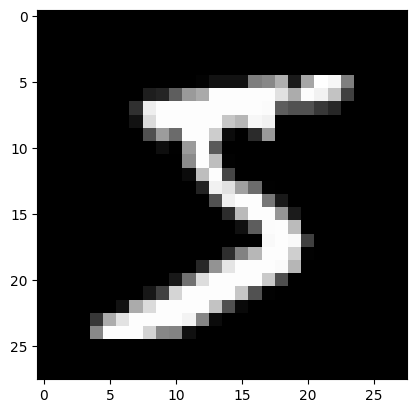

In [148]:
plt.imshow(image.reshape((28,28)),cmap="gray")

In [151]:
torch.manual_seed(85)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(train_data,batch_size=500,shuffle=False)

In [153]:
# formatting the data from show images
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [155]:
# load first batch into images and labels 
for images,labels in train_loader:
    break

In [158]:
# the 100 size of first batch is filled into images Tensor
images.shape

torch.Size([100, 1, 28, 28])

In [159]:
labels.shape

torch.Size([100])

Labels:  [   7    8    7    1    7    0    9    4    6    4    2    6]


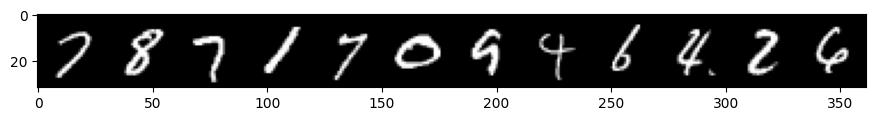

In [181]:
# show first batch until 12 with their labels
im = make_grid(images[:12],nrow=12)
plt.figure(figsize=(10.7,1))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));
print("Labels: ",labels[:12].numpy())